In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
%matplotlib inline
from sklearn import preprocessing

In [2]:
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus']=False

In [3]:
trade201904 = pd.read_csv("D:/프로그래밍/2020.9.금융빅데이터/비씨카드/거래내역_201904.csv", sep=",", encoding="CP949")
trade201905 = pd.read_csv("D:/프로그래밍/2020.9.금융빅데이터/비씨카드/거래내역_201905.csv", sep=",", encoding="CP949")
trade202004 = pd.read_csv("D:/프로그래밍/2020.9.금융빅데이터/비씨카드/거래내역_202004.csv", sep=",", encoding="CP949")
trade202005 = pd.read_csv("D:/프로그래밍/2020.9.금융빅데이터/비씨카드/거래내역_202005.csv", sep=",", encoding="CP949")
trade_jobcode = pd.read_csv("D:/프로그래밍/2020.9.금융빅데이터/비씨카드/업종코드.csv", sep=",", encoding="CP949")
trade_comcode = pd.read_csv("D:/프로그래밍/2020.9.금융빅데이터/비씨카드/공통코드.csv", sep=",", encoding="CP949")

In [4]:
trade201904

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,할부개월수,매출금액
0,20190401,6654,14688,1995,25,M,5,9998,NaN,128180
1,20190401,6654,14688,1998,20,F,5,9998,NaN,14620
2,20190401,6654,14697,1999,20,M,5,9998,NaN,32000
3,20190401,6654,14699,1960,60,F,5,9998,NaN,17588
4,20190401,6654,14699,1990,30,F,5,9998,NaN,41463
...,...,...,...,...,...,...,...,...,...,...
1048570,20190416,52829,52829,1968,50,M,9,4020,NaN,15440
1048571,20190416,52831,52831,1979,40,F,5,4010,NaN,5273
1048572,20190416,52831,52831,1981,35,M,5,4010,NaN,9707
1048573,20190416,52853,52853,1988,30,F,9,5123,NaN,228333


In [5]:
print(trade201904.duplicated().sum())
print(trade201905.duplicated().sum())
print(trade202004.duplicated().sum())
print(trade202005.duplicated().sum())

194001
200267
0
0


In [6]:
trade_jobcode

,업종코드,업종명
0,3302,L P G
1,1002,1급 호텔
2,1001,특급 호텔
3,1003,2급 호텔
4,1010,콘도
...,...,...
341,9993,외국인전용가맹점
342,9995,비씨카드정산용
343,9996,비씨카드정산용(할인)
344,9998,기타전문점


In [7]:
trade_comcode

,코드ID,세부코드ID,코드명,코드값,코드설명내용,키워드명,변경구분
0,CC13,0,매출구분코드,3,선불,NaN,NaN
1,CC13,0,매출구분코드,4,DEBIT,NaN,NaN
2,CC13,0,매출구분코드,5,일시불,NaN,NaN
3,CC13,0,매출구분코드,6,현금서비스,NaN,NaN
4,CC13,0,매출구분코드,7,회전결제,NaN,NaN
...,...,...,...,...,...,...,...
3832,CC12,3,소분류업종코드,V18B04,시도군구청,NaN,NaN
3833,CC12,3,소분류업종코드,V18B05,읍면동사무소,NaN,NaN
3834,CC12,3,소분류업종코드,V18B07,운전면허시험장,NaN,NaN
3835,CC12,3,소분류업종코드,V18B08,마을회관,NaN,NaN


In [8]:
trade_jobcode.loc[(trade_jobcode.업종코드==4010)]

,업종코드,업종명
81,4010,편 의 점


In [9]:
trade_2019 = pd.concat([trade201904,trade201905])
trade_2019 = trade_2019.reset_index(drop=True)
trade_2020 = pd.concat([trade202004,trade202005])
trade_2020 = trade_2020.reset_index(drop=True)

In [10]:
trade_2019

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,할부개월수,매출금액
0,20190401,6654,14688,1995,25,M,5,9998,NaN,128180
1,20190401,6654,14688,1998,20,F,5,9998,NaN,14620
2,20190401,6654,14697,1999,20,M,5,9998,NaN,32000
3,20190401,6654,14699,1960,60,F,5,9998,NaN,17588
4,20190401,6654,14699,1990,30,F,5,9998,NaN,41463
...,...,...,...,...,...,...,...,...,...,...
2097145,20190514,13606,14619,1976,40,F,5,9153,NaN,103467
2097146,20190514,13606,14620,1964,55,F,5,9153,NaN,106097
2097147,20190514,13606,14621,1958,60,F,5,9153,NaN,70097
2097148,20190514,13606,14633,1994,25,F,5,9153,NaN,196167


In [11]:
print(trade_2019.할부개월수.unique())
print(trade_2020.할부개월수.unique())

[nan  2.  3.  6.]
[0 6 3 2 5]


In [12]:
print(len(trade_2019.할부개월수.loc[(trade_2019.할부개월수.isnull())]))
print(len(trade_2019.할부개월수.loc[(trade_2019.할부개월수 == 2)]))
print(len(trade_2019.할부개월수.loc[(trade_2019.할부개월수 == 3)]))
print(len(trade_2019.할부개월수.loc[(trade_2019.할부개월수 == 6)]))
print("")

print(len(trade_2020.할부개월수.loc[(trade_2020.할부개월수.isnull())]))
print(len(trade_2020.할부개월수.loc[(trade_2020.할부개월수 == 0)]))
print(len(trade_2020.할부개월수.loc[(trade_2020.할부개월수 == 2)]))
print(len(trade_2020.할부개월수.loc[(trade_2020.할부개월수 == 3)]))
print(len(trade_2020.할부개월수.loc[(trade_2020.할부개월수 == 5)]))
print(len(trade_2020.할부개월수.loc[(trade_2020.할부개월수 == 6)]))

# 할부개월수는 nan 또는 0을 제외하고 갯수가 많지않으므로 지우자!

2097105
1
36
8

0
2097070
3
54
1
22


In [13]:
trade_2019 = trade_2019.drop(columns='할부개월수')
trade_2019.isnull().sum()

기준일자        0
가맹점신우편번호    0
고객신우편번호     0
생년          0
연령대코드       0
성별코드        0
매출구분코드      0
가맹점업종코드     0
매출금액        0
dtype: int64

In [14]:
trade_2020 = trade_2020.drop(columns='할부개월수')
trade_2020.isnull().sum()

기준일자        0
가맹점신우편번호    0
고객신우편번호     0
생년          0
연령대코드       0
성별코드        0
매출구분코드      0
가맹점업종코드     0
매출금액        0
dtype: int64

In [15]:
print(trade_2019.duplicated().sum())
print(trade_2020.duplicated().sum())

# ?????? 2019년도 무엇

394268
0


In [16]:
trade_2019.loc[(trade_2019.duplicated())]

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,매출금액
26113,20190401,8393,12104,1977,40,F,5,4076,187735
26120,20190401,8393,12910,1972,45,M,5,4076,317530
26121,20190401,8393,12910,1977,40,F,5,4076,289392
26122,20190401,8393,12910,1981,35,F,5,4076,283328
26126,20190401,6654,62281,1997,20,M,5,9998,13190
...,...,...,...,...,...,...,...,...,...
2097131,20190514,13606,14600,1958,60,F,5,9153,101500
2097133,20190514,13606,14600,1966,50,M,5,9153,84990
2097134,20190514,13606,14600,1967,50,F,5,9153,90473
2097139,20190514,13606,14613,1974,45,M,5,9153,35254


In [17]:
trade_2019.loc[26113]

기준일자        20190401
가맹점신우편번호        8393
고객신우편번호        12104
생년              1977
연령대코드             40
성별코드               F
매출구분코드             5
가맹점업종코드         4076
매출금액          187735
Name: 26113, dtype: object

In [18]:
trade_2019.loc[(trade_2019.매출금액 == trade_2019.매출금액.loc[26113])]

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,매출금액
21010,20190401,8393,12104,1977,40,F,5,4076,187735
26113,20190401,8393,12104,1977,40,F,5,4076,187735


In [19]:
# 중복값이 너무 많지만, 그래도 확실한 중복값으로 보이니 지우자.

trade_2019 = trade_2019.drop_duplicates()
trade_2019 = trade_2019.reset_index(drop=True)
trade_2019

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,매출금액
0,20190401,6654,14688,1995,25,M,5,9998,128180
1,20190401,6654,14688,1998,20,F,5,9998,14620
2,20190401,6654,14697,1999,20,M,5,9998,32000
3,20190401,6654,14699,1960,60,F,5,9998,17588
4,20190401,6654,14699,1990,30,F,5,9998,41463
...,...,...,...,...,...,...,...,...,...
1702877,20190514,13606,14619,1976,40,F,5,9153,103467
1702878,20190514,13606,14620,1964,55,F,5,9153,106097
1702879,20190514,13606,14621,1958,60,F,5,9153,70097
1702880,20190514,13606,14633,1994,25,F,5,9153,196167


In [20]:
print(trade_2019.매출구분코드.unique())
print(trade_2020.매출구분코드.unique())

[5 9 7 8]
[ 5  9  7  8 19 15 18]


In [21]:
print(len(trade_2019.매출구분코드.loc[(trade_2019.매출구분코드 == 5)]))
print(len(trade_2019.매출구분코드.loc[(trade_2019.매출구분코드 == 7)]))
print(len(trade_2019.매출구분코드.loc[(trade_2019.매출구분코드 == 8)]))
print(len(trade_2019.매출구분코드.loc[(trade_2019.매출구분코드 == 9)]))
print("")

print(len(trade_2020.매출구분코드.loc[(trade_2020.매출구분코드 == 5)]))
print(len(trade_2020.매출구분코드.loc[(trade_2020.매출구분코드 == 7)]))
print(len(trade_2020.매출구분코드.loc[(trade_2020.매출구분코드 == 8)]))
print(len(trade_2020.매출구분코드.loc[(trade_2020.매출구분코드 == 9)]))
print(len(trade_2020.매출구분코드.loc[(trade_2020.매출구분코드 == 15)]))
print(len(trade_2020.매출구분코드.loc[(trade_2020.매출구분코드 == 18)]))
print(len(trade_2020.매출구분코드.loc[(trade_2020.매출구분코드 == 19)]))

# 매출구분은 대부분 일시불/즉시불인데.. 알아본 결과
# 일시불=신용카드 즉시 사용하는 개념,
# 즉시불=체크카드 즉시 사용하는 개념인 듯하다.
# 이 컬럼은 분석에 필요할까..?

973933
4330
44
724575

1053007
10031
79
1033944
41
1
47


In [22]:
sex = {"M":1, "F":0}
trade_2019.replace(sex, inplace=True)
trade_2020.replace(sex, inplace=True)
trade_2019

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,매출금액
0,20190401,6654,14688,1995,25,1,5,9998,128180
1,20190401,6654,14688,1998,20,0,5,9998,14620
2,20190401,6654,14697,1999,20,1,5,9998,32000
3,20190401,6654,14699,1960,60,0,5,9998,17588
4,20190401,6654,14699,1990,30,0,5,9998,41463
...,...,...,...,...,...,...,...,...,...
1702877,20190514,13606,14619,1976,40,0,5,9153,103467
1702878,20190514,13606,14620,1964,55,0,5,9153,106097
1702879,20190514,13606,14621,1958,60,0,5,9153,70097
1702880,20190514,13606,14633,1994,25,0,5,9153,196167


In [23]:
trade_jobcode

,업종코드,업종명
0,3302,L P G
1,1002,1급 호텔
2,1001,특급 호텔
3,1003,2급 호텔
4,1010,콘도
...,...,...
341,9993,외국인전용가맹점
342,9995,비씨카드정산용
343,9996,비씨카드정산용(할인)
344,9998,기타전문점


In [24]:
ex = dict(zip([i for i in trade_jobcode.업종코드], [j for j in trade_jobcode.업종명]))
ex

{3302: 'L P G',
 1002: '1급 호텔',
 1001: '특급 호텔',
 1003: '2급 호텔',
 1010: '콘도',
 1020: '기타숙박업',
 1021: '여관/기타숙박업(할부)',
 1101: '항 공 사',
 1110: '관광여행',
 1120: '고속 버스',
 1121: '철도',
 1122: '여 객 선',
 1123: '택시',
 1124: '택시회사',
 1130: '렌 트 카',
 1199: '기타교통수단',
 2001: '골프 용품',
 2002: '스포츠레져용품',
 2003: '총포류판매',
 2010: '악 기 점',
 2011: '피아노대리점',
 2020: 'DVD/음반/테이프판매',
 2021: '비디오점',
 2029: '기타음반제품',
 2101: '골프경기장',
 2102: '골프연습장',
 2103: '카지노',
 2104: '스크린골프',
 2110: '스 키 장',
 2111: '볼 링 장',
 2112: '테니스 장',
 2113: '수 영 장',
 2114: '헬스 크럽',
 2120: '종합레져타운',
 2121: '당구장',
 2130: '노래방',
 2199: '기타레져업',
 2201: '골동품 점',
 2202: '화랑',
 2203: '골동품점(할부)',
 2204: '화랑(할부)',
 2210: '화방표구점',
 2215: '민예공예품',
 2220: '수 족 관',
 2230: '화원',
 2240: '애완 동물',
 2250: '영화관',
 2251: '티켓',
 2299: '문화취미기타',
 3001: '일반 가구',
 3002: '철제 가구',
 3099: '기타가구',
 3101: '가전 제품',
 3102: '냉열 기기',
 3199: '기타전기제품',
 3201: '주방 용구',
 3202: '주방용식기',
 3210: '정 수 기',
 3299: '기타주방용구',
 3301: '주 유 소',
 3303: '연탄 판매',
 3304: '유류 판매',
 3305: 'SK주

In [25]:
ex2 = trade_2019['가맹점업종코드'].replace(ex)
trade_2019_rep = copy.copy(trade_2019)
trade_2019_rep['가맹점업종코드'] = ex2
trade_2019_rep

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,매출금액
0,20190401,6654,14688,1995,25,1,5,기타전문점,128180
1,20190401,6654,14688,1998,20,0,5,기타전문점,14620
2,20190401,6654,14697,1999,20,1,5,기타전문점,32000
3,20190401,6654,14699,1960,60,0,5,기타전문점,17588
4,20190401,6654,14699,1990,30,0,5,기타전문점,41463
...,...,...,...,...,...,...,...,...,...
1702877,20190514,13606,14619,1976,40,0,5,이동통신요금,103467
1702878,20190514,13606,14620,1964,55,0,5,이동통신요금,106097
1702879,20190514,13606,14621,1958,60,0,5,이동통신요금,70097
1702880,20190514,13606,14633,1994,25,0,5,이동통신요금,196167


In [26]:
trade_2019_rep.가맹점업종코드.unique()

array(['기타전문점', '슈퍼 마켓', '구내매점(국가기관등)', '대형할인점', '스넥', '일반한식', '제 과 점',
       '서양음식', '편 의 점', '주 유 소', '택시', '인터넷종합Mall', '기타레져업', '연 쇄 점',
       '공공 요금', '인터넷 P/G', '기계 공구', '비영리/비대상', '인터넷Mall', '고속 버스',
       '기타음료식품', '농/축협직영매장', '초중고교육기관', '자사카드발행백화점', '기타회원제형태업소4',
       '정보서비스', '사무서비스', 'GS주유소', '복지 매점', '세탁소', '철도', '약국', '완 구 점',
       '농협하나로클럽', '농축수산품', '정장(남성)', '문구용 품', '기타전기제품', '기타잡화', '정 육 점',
       '사무통신기기수리', '위탁급식업', '비 영 리', '현대정유오일뱅크', '출판인쇄물', '의원', '사우나',
       '통신판매(일반)', '종합레져타운', '기타용역서비스', '헬스 크럽', '기타의류', '미 용 원', '기타유통업',
       '기타서적문구', '중국음식', '주 차 장', '일식회집', '일반 가구', '항 공 사', '일반 서적',
       '소프트웨어', '보습학원', '레져업소(회원제형태)', '정장(여성)', '아동의류', '인테 리어', 'CATV',
       '노래방', '일반백화점', '스포츠레져용품', '공무원연금매점', '여 객 선', '기타건축자재', '컴 퓨 터',
       '유아원', '사무 기기', '예체능학원', '병원(응급실운영)', 'SK주유소', '유류 판매',
       '병원(응급실미운영)', '주점', '한의원', '비료/농약/사료/종자', '종합병원', '상품권', '화 장 품',
       '손해 보험', '학원(회원제형태)', 'CATV홈쇼핑', 'DVD/음반/테이프판매', '치과의원', '외국어학원',
       'L

In [27]:
len(trade_2019.가맹점업종코드.unique())

155

In [28]:
onjob2019 = []

for i in range(len(trade_2019_rep['가맹점업종코드'].unique())):
    job = trade_2019_rep[(trade_2019_rep.가맹점업종코드 == trade_2019_rep['가맹점업종코드'].unique()[i])]
    onjob2019.append(job)
    onjob2019[i] = onjob2019[i].reset_index(drop=True)

In [29]:
onjob2019[0]

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,매출금액
0,20190401,6654,14688,1995,25,1,5,기타전문점,128180
1,20190401,6654,14688,1998,20,0,5,기타전문점,14620
2,20190401,6654,14697,1999,20,1,5,기타전문점,32000
3,20190401,6654,14699,1960,60,0,5,기타전문점,17588
4,20190401,6654,14699,1990,30,0,5,기타전문점,41463
...,...,...,...,...,...,...,...,...,...
655102,20190514,6654,14583,1964,55,1,5,기타전문점,69333
655103,20190514,6654,16420,1961,55,1,5,기타전문점,231500
655104,20190514,6654,16699,1973,45,0,5,기타전문점,57387
655105,20190514,6654,16904,1953,65,0,5,기타전문점,7867


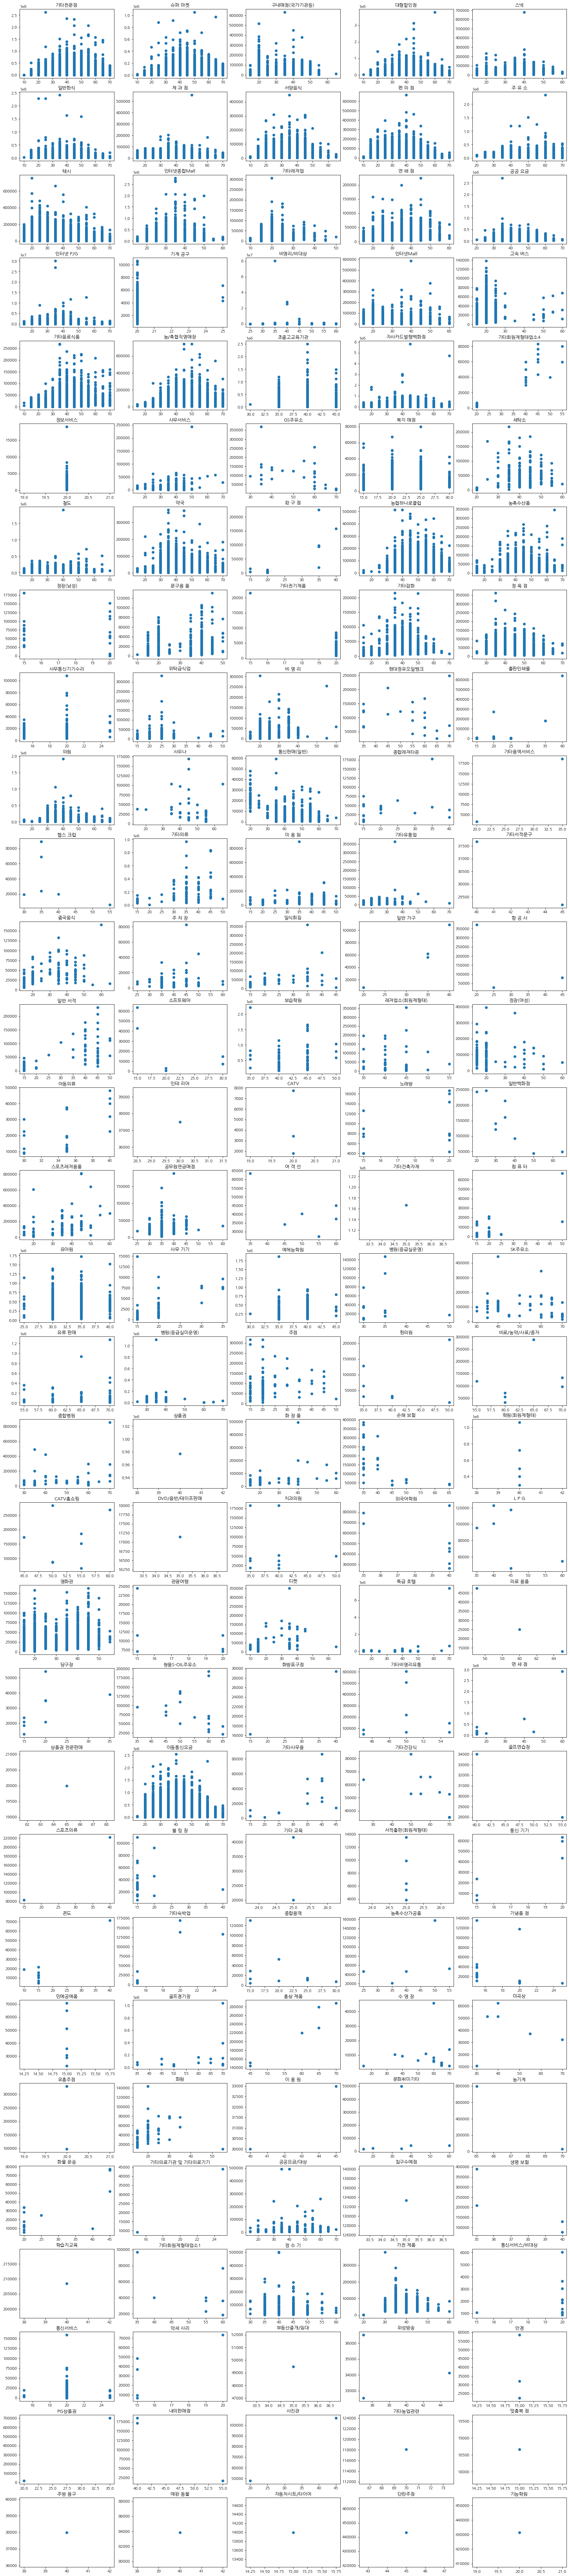

In [44]:
fig, axes = plt.subplots(nrows=31,ncols=5)
fig.set_size_inches(25,120)

x = 0
y = 0
i = 0

while i < 155:
    for x in range(31):
        for y in range(5):
            if i >= 155:
                break
            axes[x][y].scatter(onjob2019[i]['연령대코드'],onjob2019[i]['매출금액'])
            axes[x][y].set_title(onjob2019[i]['가맹점업종코드'][0])
            i += 1

In [ ]:
# -------------------------- 2020

In [45]:
ex2 = trade_2020['가맹점업종코드'].replace(ex)
trade_2020_rep = copy.copy(trade_2020)
trade_2020_rep['가맹점업종코드'] = ex2
trade_2020_rep

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,매출금액
0,20200401,4517,46993,1966,55,0,5,인터넷 P/G,43733
1,20200401,48069,48069,1990,30,1,9,편 의 점,6167
2,20200401,14748,14748,1982,35,0,9,편 의 점,10933
3,20200401,37558,37558,1980,40,0,5,슈퍼 마켓,39453
4,20200401,4130,4129,1985,35,0,5,슈퍼 마켓,27223
...,...,...,...,...,...,...,...,...,...
2097145,20200522,15015,15015,1988,30,1,5,편 의 점,8573
2097146,20200522,39196,39196,1960,60,0,9,슈퍼 마켓,13150
2097147,20200522,48106,48109,1968,50,0,5,대형할인점,39285
2097148,20200522,37558,37558,1968,50,0,9,슈퍼 마켓,12743


In [46]:
len(trade_2020.가맹점업종코드.unique())

142

In [47]:
onjob2020 = []

for i in range(len(trade_2020_rep['가맹점업종코드'].unique())):
    job = trade_2020_rep[(trade_2020_rep.가맹점업종코드 == trade_2020_rep['가맹점업종코드'].unique()[i])]
    onjob2020.append(job)
    onjob2020[i] = onjob2020[i].reset_index(drop=True)

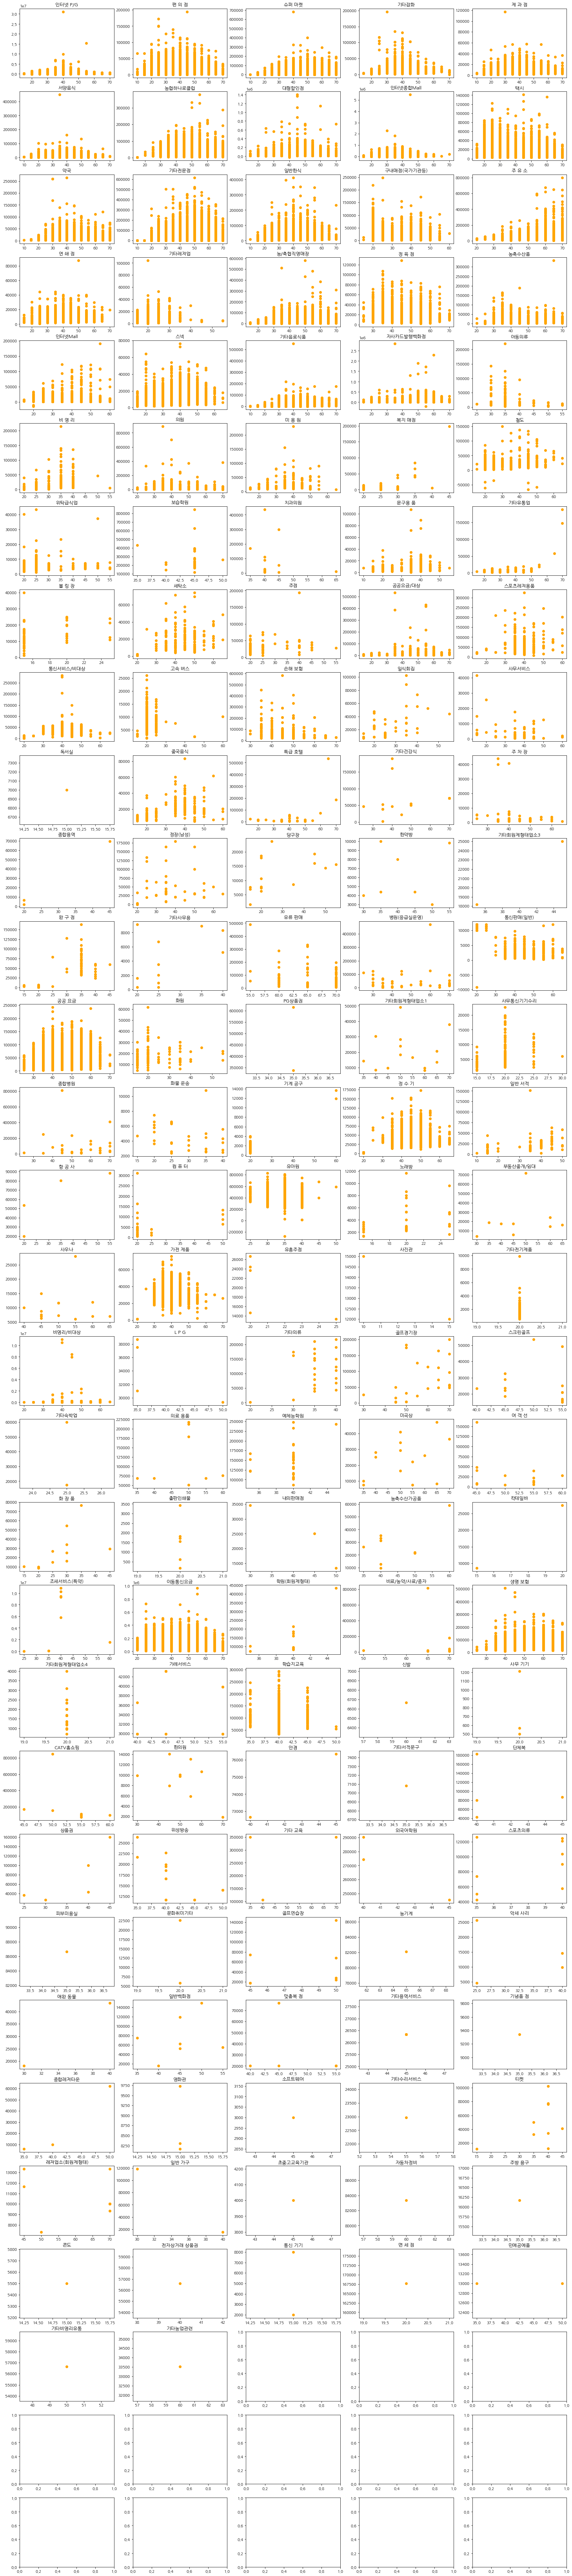

In [51]:
fig, axes = plt.subplots(nrows=31,ncols=5)
fig.set_size_inches(25,120)

x = 0
y = 0
i = 0

while i < 142:
    for x in range(31):
        for y in range(5):
            if i >= 142:
                break
            axes[x][y].scatter(onjob2020[i]['연령대코드'],onjob2020[i]['매출금액'], color='orange')
            axes[x][y].set_title(onjob2020[i]['가맹점업종코드'][0])
            i += 1

In [31]:
trade_2019.가맹점신우편번호.unique()

array([ 6654, 62402, 63070, ..., 16454, 42137, 42499], dtype=int64)

In [32]:
trade_2019

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,매출금액
0,20190401,6654,14688,1995,25,1,5,9998,128180
1,20190401,6654,14688,1998,20,0,5,9998,14620
2,20190401,6654,14697,1999,20,1,5,9998,32000
3,20190401,6654,14699,1960,60,0,5,9998,17588
4,20190401,6654,14699,1990,30,0,5,9998,41463
...,...,...,...,...,...,...,...,...,...
1702877,20190514,13606,14619,1976,40,0,5,9153,103467
1702878,20190514,13606,14620,1964,55,0,5,9153,106097
1702879,20190514,13606,14621,1958,60,0,5,9153,70097
1702880,20190514,13606,14633,1994,25,0,5,9153,196167


In [33]:
trade_2019.loc[(trade_2019.가맹점신우편번호 > 3000) & (trade_2019.가맹점신우편번호 < 3300)]

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,매출금액
11782,20190401,3078,3083,2002,15,1,9,2199,8400
11783,20190401,3184,44919,1995,25,1,9,8021,13350
63704,20190401,3028,3174,1950,65,1,5,4111,83753
63705,20190401,3030,3026,2000,15,1,9,2199,7000
63706,20190401,3086,3085,1992,25,0,9,8006,81267
...,...,...,...,...,...,...,...,...,...
1686806,20190514,3089,3090,1973,45,0,9,4020,13167
1686807,20190514,3092,3092,1996,20,0,9,4010,22517
1686808,20190514,3092,3092,2001,15,0,9,4010,9800
1686809,20190514,3116,3116,1990,25,0,9,4010,30133


In [34]:
temp2019 = trade_2019.loc[(trade_2019.가맹점신우편번호 > 3000) & (trade_2019.가맹점신우편번호 < 3300)]
temp2019 = temp2019.reset_index(drop=True)
temp2019

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,매출금액
0,20190401,3078,3083,2002,15,1,9,2199,8400
1,20190401,3184,44919,1995,25,1,9,8021,13350
2,20190401,3028,3174,1950,65,1,5,4111,83753
3,20190401,3030,3026,2000,15,1,9,2199,7000
4,20190401,3086,3085,1992,25,0,9,8006,81267
...,...,...,...,...,...,...,...,...,...
1104,20190514,3089,3090,1973,45,0,9,4020,13167
1105,20190514,3092,3092,1996,20,0,9,4010,22517
1106,20190514,3092,3092,2001,15,0,9,4010,9800
1107,20190514,3116,3116,1990,25,0,9,4010,30133


In [36]:
trade_2019

,기준일자,가맹점신우편번호,고객신우편번호,생년,연령대코드,성별코드,매출구분코드,가맹점업종코드,매출금액
0,20190401,6654,14688,1995,25,1,5,9998,128180
1,20190401,6654,14688,1998,20,0,5,9998,14620
2,20190401,6654,14697,1999,20,1,5,9998,32000
3,20190401,6654,14699,1960,60,0,5,9998,17588
4,20190401,6654,14699,1990,30,0,5,9998,41463
...,...,...,...,...,...,...,...,...,...
1702877,20190514,13606,14619,1976,40,0,5,9153,103467
1702878,20190514,13606,14620,1964,55,0,5,9153,106097
1702879,20190514,13606,14621,1958,60,0,5,9153,70097
1702880,20190514,13606,14633,1994,25,0,5,9153,196167


In [38]:
trade_sum2019 = trade_2019.groupby(['기준일자'])['매출금액'].sum()
trade_sum2019 = trade_sum2019.reset_index()
trade_sum2019

,기준일자,매출금액
0,20190401,3824035350
1,20190402,1660787692
2,20190403,848140418
3,20190404,789133538
4,20190405,1228606051
5,20190406,747613950
6,20190407,682299176
7,20190408,1697974943
8,20190409,1844888697
9,20190410,2522955835


In [39]:
trade_sum2020 = trade_2020.groupby(['기준일자'])['매출금액'].sum()
trade_sum2020 = trade_sum2020.reset_index()
trade_sum2020

,기준일자,매출금액
0,20200401,549759899
1,20200402,547360235
2,20200403,471249202
3,20200404,437303355
4,20200405,400274727
5,20200406,795237059
6,20200407,744778010
7,20200408,435134161
8,20200409,544458336
9,20200410,3442634481


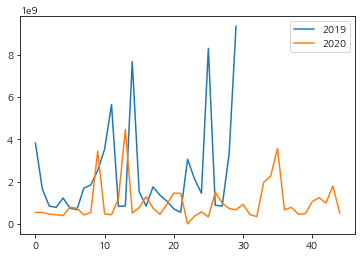

In [41]:
plt.plot(trade_sum2019.index, trade_sum2019.매출금액, label='2019')
plt.plot(trade_sum2020.index, trade_sum2020.매출금액, label='2020')
plt.legend()
plt.show()